In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
experiment_results = pd.read_csv("results_2023-03-12-16-23", index_col="sequence_length")

experiment_number_unique = experiment_results["experiment_number"].unique()
assert len(experiment_number_unique) == 1
experiment_number = experiment_number_unique[0]

experiment_results = experiment_results.drop("experiment_number", axis=1)
experiment_results

,selection_sort_time,merge_sort_time,tim_sort_time
sequence_length,,,
10,0.003237,0.004071,0.001287
100,0.119657,0.041344,0.002837
1000,11.727837,0.536786,0.024173
10000,1158.427884,6.708213,0.288120


In [15]:
experiment_results = experiment_results.stack().reset_index()
experiment_results.columns, experiment_results

(Index(['sequence_length', 'level_1', 0], dtype='object'),
     sequence_length              level_1            0
 0                10  selection_sort_time     0.003237
 1                10      merge_sort_time     0.004071
 2                10        tim_sort_time     0.001287
 3               100  selection_sort_time     0.119657
 4               100      merge_sort_time     0.041344
 5               100        tim_sort_time     0.002837
 6              1000  selection_sort_time    11.727837
 7              1000      merge_sort_time     0.536786
 8              1000        tim_sort_time     0.024173
 9             10000  selection_sort_time  1158.427884
 10            10000      merge_sort_time     6.708213
 11            10000        tim_sort_time     0.288120)

In [16]:
experiment_results = experiment_results.rename({"level_1": "algorithm_type", 0: "seconds"}, axis=1)
experiment_results

,sequence_length,algorithm_type,seconds
0,10,selection_sort_time,0.003237
1,10,merge_sort_time,0.004071
2,10,tim_sort_time,0.001287
3,100,selection_sort_time,0.119657
4,100,merge_sort_time,0.041344
5,100,tim_sort_time,0.002837
6,1000,selection_sort_time,11.727837
7,1000,merge_sort_time,0.536786
8,1000,tim_sort_time,0.024173
9,10000,selection_sort_time,1158.427884


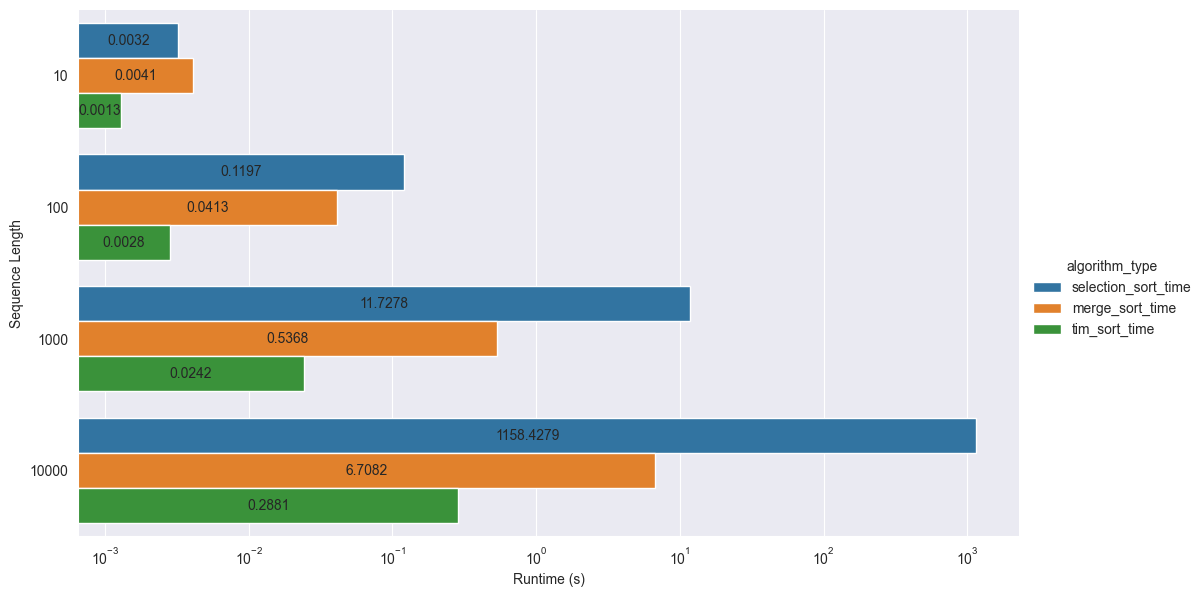

In [40]:
g = sns.catplot(data=experiment_results,
                kind="bar",
                y="sequence_length",
                x="seconds",
                hue="algorithm_type",
                orient="h",
                height=6,
                aspect=1.75,
            )
plt.xscale("log")
plt.ylabel("Sequence Length")
plt.xlabel("Runtime (s)")

ax = g.facet_axis(0, 0)

seconds = experiment_results["seconds"].to_list()

seconds_grouped = []
for algorithm_type in experiment_results["algorithm_type"].unique():
    algorithm_type_filtered = experiment_results[experiment_results["algorithm_type"] == algorithm_type]
    seconds_filtered = algorithm_type_filtered["seconds"]

    seconds_grouped.append(seconds_filtered.to_list())

for seconds_for_type, c in zip(seconds_grouped, ax.containers):
    labels = [round(v, 4) for v in seconds_for_type]
    ax.bar_label(c, labels=labels, label_type='center')